In [ ]:
import zipfile
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
filename = "given_dataset.csv.zip"

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
file = "given_dataset.csv"
df = pd.read_csv(file)

In [5]:
# from sklearn.preprocessing import KBinsDiscretizer
data = df.to_numpy()

print(data.shape)
Y = data[:, -1]
X = data[:, 1:8]

# est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
# Xe = est.fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X[:50000], Y[:50000], test_size=0.20, random_state=42)

(2041687, 9)


In [ ]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
cnt = Counter(Ytrain)

cnt

(1367930, 7) (673757, 7) (1367930,) (673757,)


Counter({0.0: 19483, 1.0: 1348447})

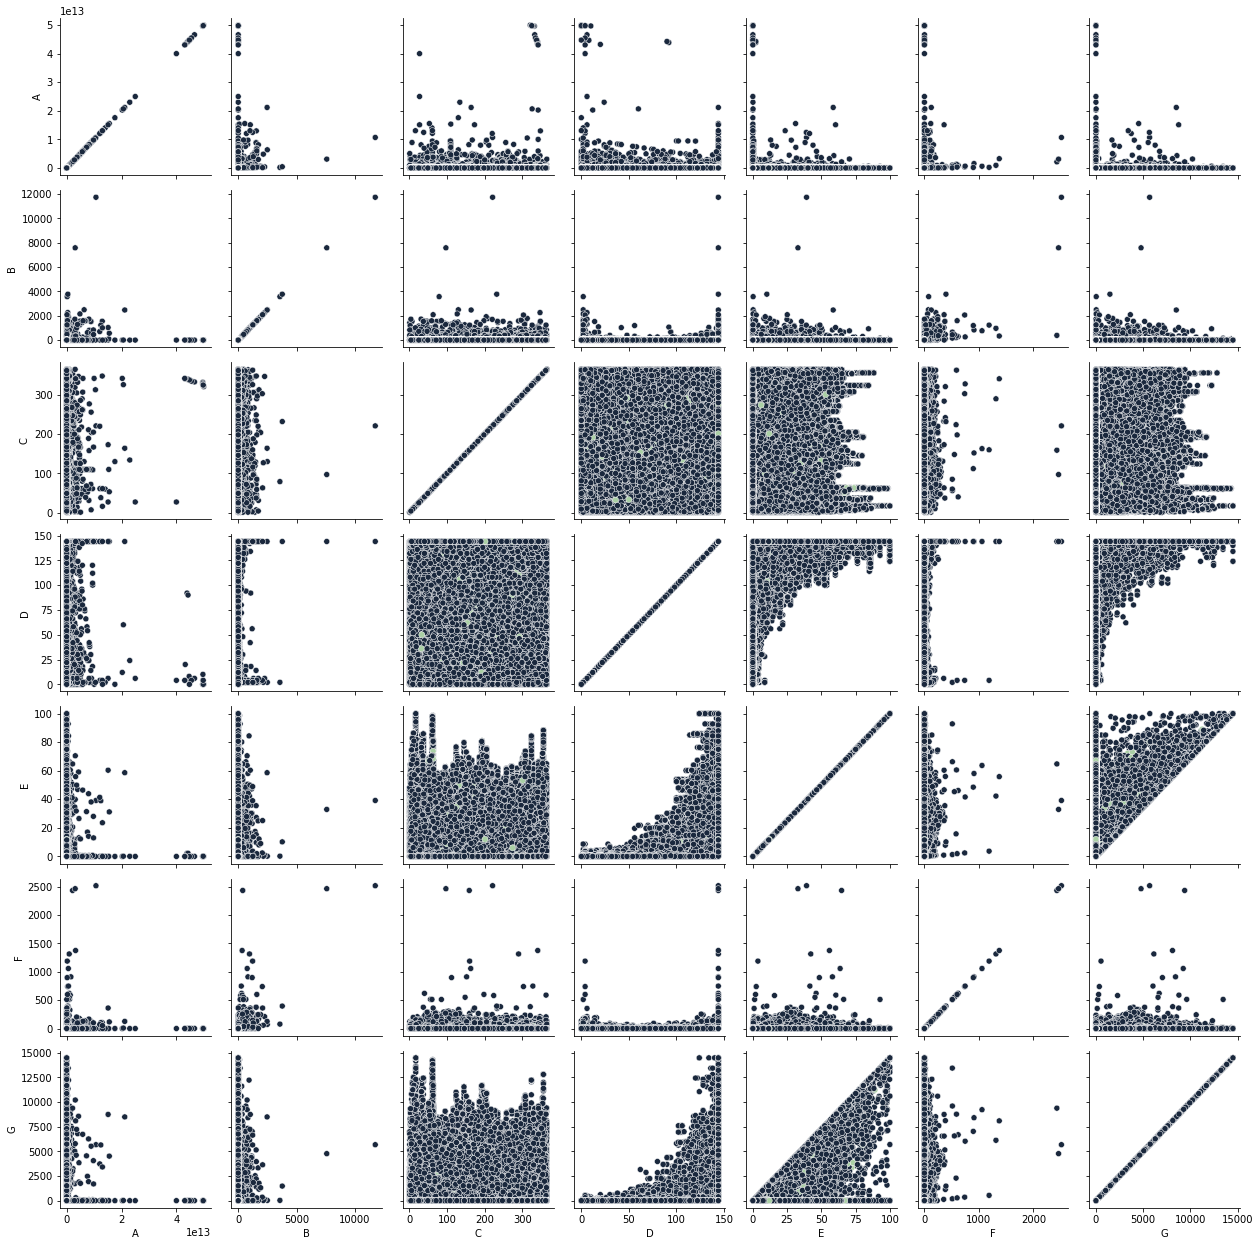

In [ ]:
# import matplotlib.pyplot as plt 

# df.iloc/[:, 1:8].plot(kind = 'hist')

import seaborn as sns 
  
g = sns.PairGrid(df.iloc[:,1:], hue='T', palette="ch:r=-.5,l=.75")
g.map(sns.scatterplot)

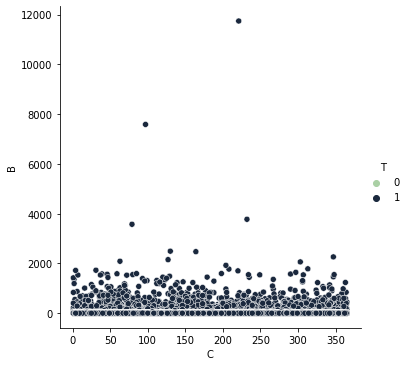

In [ ]:
sns.relplot(x="C", y="B", hue="T", palette="ch:r=-.5,l=.75", data=df)

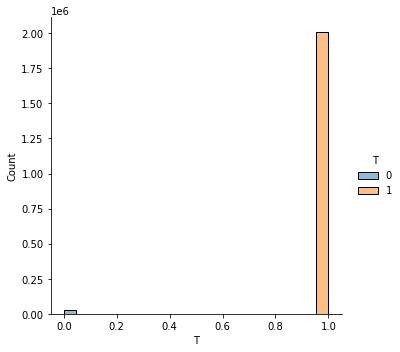

In [ ]:
## distribution plot
sns.displot(df, x="T", hue="T")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')
X_res, y_res = rus.fit_resample(Xtrain, Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


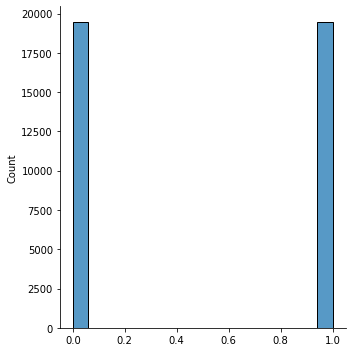

In [ ]:
sns.displot(y_res)

In [6]:
from imblearn.ensemble import BalancedBaggingClassifier

pred_bagtest = []
pred_bagtrain = []

for depth in range(18, 30, 3):
    bal_tree = BalancedBaggingClassifier( 
            DecisionTreeClassifier(max_depth=depth, random_state=20, min_samples_leaf=20),
            oob_score= False, verbose = 1, bootstrap_features = True, n_jobs = 8, n_estimators = 51, warm_start = False) 

    bal_tree.fit(Xtrain, Ytrain)

    prediction = bal_tree.predict(Xtest)    
    auc = roc_auc_score(Ytest, prediction)
    pred_bagtest.append(auc)

    prediction = bal_tree.predict(Xtrain)    
    auc = roc_auc_score(Ytrain, prediction)
    pred_bagtrain.append(auc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

[]

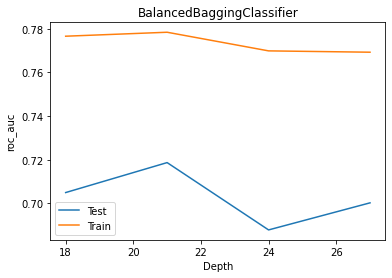

In [26]:
plt.plot(range(18, 30, 3), pred_bagtest, label='Test')
plt.plot(range(18, 30, 3), pred_bagtrain, label = 'Train')

plt.xlabel('Depth')
plt.ylabel('roc_auc')
plt.title('BalancedBaggingClassifier')
plt.legend()
plt.plot()

In [10]:
from imblearn.ensemble import BalancedBaggingClassifier

pred_bagtest = []
pred_bagtrain = []


for est in range(45, 55, 3):
    bal_tree = BalancedBaggingClassifier( 
            DecisionTreeClassifier(max_depth=depth, random_state=20, min_samples_leaf=20),
            oob_score= False, verbose = 1, bootstrap_features = True, n_jobs = 8, n_estimators = est, warm_start = False) 

    bal_tree.fit(Xtrain, Ytrain)

    prediction = bal_tree.predict(Xtest)    
    auc = roc_auc_score(Ytest, prediction)
    pred_bagtest.append(auc)

    prediction = bal_tree.predict(Xtrain)    
    auc = roc_auc_score(Ytrain, prediction)
    pred_bagtrain.append(auc)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    1.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Don

[]

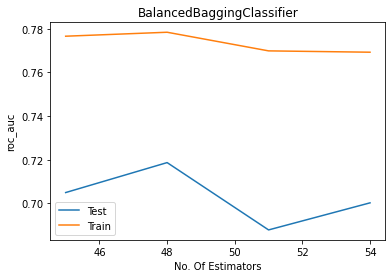

In [27]:
plt.plot(range(45, 55, 3), pred_bagtest, label='Test')
plt.plot(range(45, 55, 3), pred_bagtrain, label = 'Train')

plt.xlabel('No. Of Estimators')
plt.ylabel('roc_auc')
plt.title('BalancedBaggingClassifier')
plt.legend()
plt.plot()

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')
X_res, y_res = rus.fit_resample(Xtrain, Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

pred_grad_test = []
pred_train = []
for depth in range(7, 15, 2):
    gradboostreg = GradientBoostingRegressor(max_depth = depth, n_estimators = 350, 
                                            validation_fraction= 0.25, 
                                            subsample = 0.9)
    gradboostreg.fit(X_res, y_res)
    prediction = gradboostreg.predict(Xtest)    
    auc = roc_auc_score(Ytest, prediction)
    pred_grad_test.append(auc)

    prediction = gradboostreg.predict(Xtrain)    
    auc = roc_auc_score(Ytrain, prediction)
    pred_train.append(auc)


[]

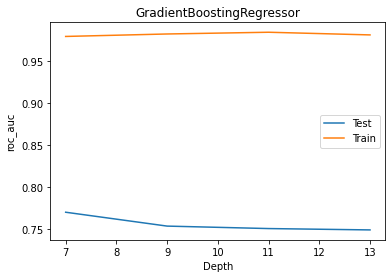

In [28]:
plt.plot(range(7, 15, 2), pred_grad_test, label='Test')
plt.plot(range(7, 15, 2), pred_train, label = 'Train')

plt.xlabel('Depth')
plt.ylabel('roc_auc')
plt.title('GradientBoostingRegressor')
plt.legend()
plt.plot()

In [ ]:
# GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
pred_gradtest = []
pred_gradtrain = []


for estimator in range(300, 370, 15):
    gradboostreg = GradientBoostingRegressor(max_depth = 8, n_estimators = estimator, 
                                            validation_fraction= 0.25, 
                                            subsample = 0.9)
    gradboostreg.fit(X_res, y_res)
    prediction = gradboostreg.predict(Xtest)    
    auc = roc_auc_score(Ytest, prediction)

    pred_gradtest.append(auc)

    gradboostreg.fit(X_res, y_res)
    prediction = gradboostreg.predict(Xtrain)    
    auc = roc_auc_score(Ytrain, prediction)

    pred_gradtrain.append(auc)

[]

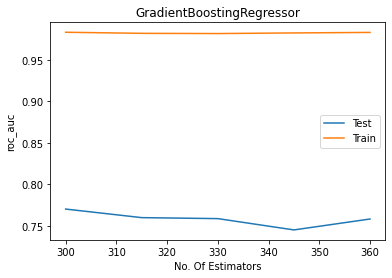

In [29]:
plt.plot(range(300, 370, 15), pred_gradtest, label='Test')
plt.plot(range(300, 370, 15), pred_gradtrain, label = 'Train')

plt.xlabel('No. Of Estimators')
plt.ylabel('roc_auc')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.plot()

In [31]:
from xgboost import XGBRegressor

# 9 350
# 0.882
# 88.257

predregtest = []
predregtrain = []

for dep in range(6, 12):
    model = XGBRegressor(n_jobs = 8,max_depth =dep,objective='reg:logistic',learning_rate=0.01, subsample=0.9,n_estimators=250,
                        reg_alpha=0.005, min_child_weight=6,colsample_bytree=0.9,seed=27)
    model.fit(X_res, y_res)

    prediction = model.predict(Xtest)
    auc = roc_auc_score(Ytest, prediction)
    predregtest.append(auc)

    prediction = model.predict(Xtrain)
    auc = roc_auc_score(Ytrain, prediction)
    predregtrain.append(auc)

[]

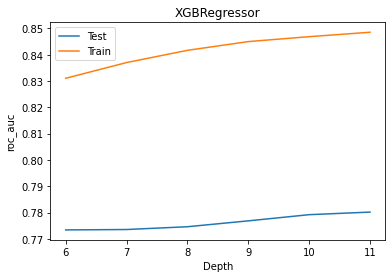

In [32]:
plt.plot(range(6, 12), predregtest, label='Test')
plt.plot(range(6, 12), predregtrain, label = 'Train')

plt.xlabel('Depth')
plt.ylabel('roc_auc')
plt.legend()
plt.title('XGBRegressor')
plt.plot()

In [33]:
from xgboost import XGBRegressor

# 9 350
# 0.882
# 88.257

predregtrain = []
predregtest = []

for est in range(250, 350, 40):
    model = XGBRegressor(n_jobs = 8,max_depth =dep,objective='reg:logistic',learning_rate=0.01, subsample=0.9,n_estimators=est,
                        reg_alpha=0.005, min_child_weight=6,colsample_bytree=0.9,seed=27)
    model.fit(X_res, y_res)

    prediction = model.predict(Xtest)
    auc = roc_auc_score(Ytest, prediction)
    predregtest.append(auc)

    prediction = model.predict(Xtrain)
    auc = roc_auc_score(Ytrain, prediction)

    predregtrain.append(auc)

[]

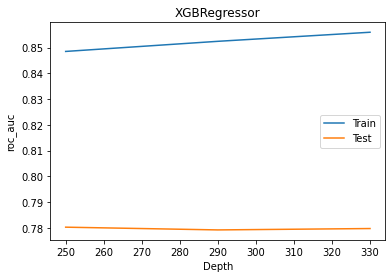

In [34]:
plt.plot(range(250, 350, 40), predregtrain, label = 'Train')
plt.plot(range(250, 350, 40), predregtest, label='Test')

plt.xlabel('Depth')
plt.ylabel('roc_auc')
plt.title('XGBRegressor')
plt.legend()
plt.plot()

In [ ]:
bal_tree = BalancedBaggingClassifier( 
        DecisionTreeClassifier(max_depth=25, random_state=20, min_samples_leaf=20),
        oob_score= True, verbose = 1, bootstrap_features = True, n_jobs = 8, n_estimators = 200, warm_start = False) 

bal_tree.fit(Xtrain, Ytrain)

prediction = bal_tree.predict(Xtest)    
auc = roc_auc_score(Ytest, prediction)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.5min remaining:  4.5min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   14.1s remaining:   42.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   22.4s finished


In [ ]:
auc

0.7867852080175969

In [ ]:
import pickle
pickle.dump(bal_tree,open('model_balancedBagging','wb'))

In [ ]:
pred_filename = "to_predict.csv.zip"

with zipfile.ZipFile(pred_filename, 'r') as zip_ref:
    zip_ref.extractall()

file_name = "to_predict.csv"
df_pred = pd.read_csv(file_name)

In [ ]:
prediction = bal_tree.predict(df_pred.to_numpy()[:, 1:])

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   18.8s remaining:   56.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   29.0s finished


In [ ]:
df_pred = pd.DataFrame(data = prediction,  
                  index = df_pred.iloc[ : ,0]) 

In [ ]:
df_pred.rename(columns={0: "T"}, inplace = True)
df_pred.to_csv('output.csv')